<a href="https://colab.research.google.com/github/diagen32/itogovya/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BF%D0%BE_%D0%BA%D1%83%D1%80%D1%81%D1%83_%22Python_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%22_%D0%9F%D0%B0%D0%BF%D0%B5%D1%82%D0%B8%D0%BD_%D0%94_%D0%90_PYDA_43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pandas.io.parsers.readers import NamedTuple
import requests
from urllib.parse import urlencode

#грузим файлы с яндекс диска
def download_file_ya_disk(name_file, url_file):
  base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
  public_key = url_file  # Сюда вписываете вашу ссылку

  # Получаем загрузочную ссылку
  final_url = base_url + urlencode(dict(public_key=public_key))
  response = requests.get(final_url)
  download_url = response.json()['href']

  # Загружаем файл и сохраняем его
  download_response = requests.get(download_url)
  with open('/home/'+name_file, 'wb') as f:   # Здесь укажите нужный путь к файлу
      f.write(download_response.content)

In [3]:
import zipfile

#словарь имен и ссылок

url_name_file = {
    '4-modul-1.zip': 'https://disk.yandex.ru/d/QhSxtTcP5gK3HQ'
}

#Загружаем файлы если коллаб удалил файлы

for name_file, url_file in url_name_file.items():
  download_file_ya_disk(name_file, url_file)
  print(f"Файл {name_file} загружен")
  archive = "/home/" + name_file
  with zipfile.ZipFile(archive, 'r') as zip_file:
      zip_file.extractall("/home/")
      print(f"Файлы разорхивированы в папку {archive[:-4]}")

Файл 4-modul-1.zip загружен
Файлы разорхивированы в папку /home/4-modul-1


/home/dz/HR.csv

1 Загрузите файл HR.csv в pandas dataframe

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('/home/dz/HR.csv')

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [5]:
print(df.isnull().values.any()) # проверим на наличие пропусков, мало ли
df.head()

False


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [6]:
df.describe() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [8]:
df_3 = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]

In [9]:
import plotly.figure_factory as ff

corrs = df_3.corr()

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

Максимально скоррелированные данные:

average_montly_hours и number_project

last_evaluation и number_project

Минимально скоррелированные данные:

left и satisfaction_level

left и Work_accident

4 Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [10]:
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

5 Показать распределение сотрудников по зарплатам.

<Axes: ylabel='salary'>

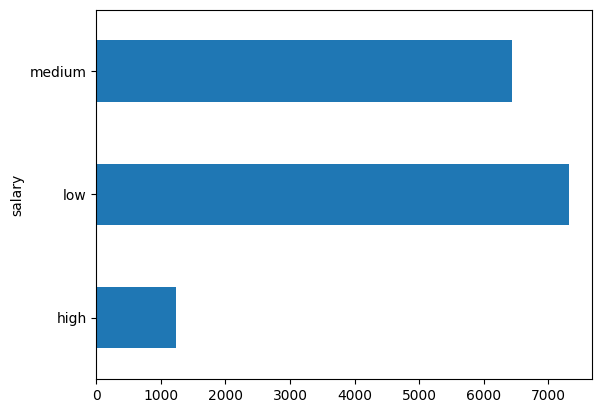

In [11]:
df.groupby('salary')['salary'].count().plot(kind='barh')

6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

<Axes: ylabel='department,salary'>

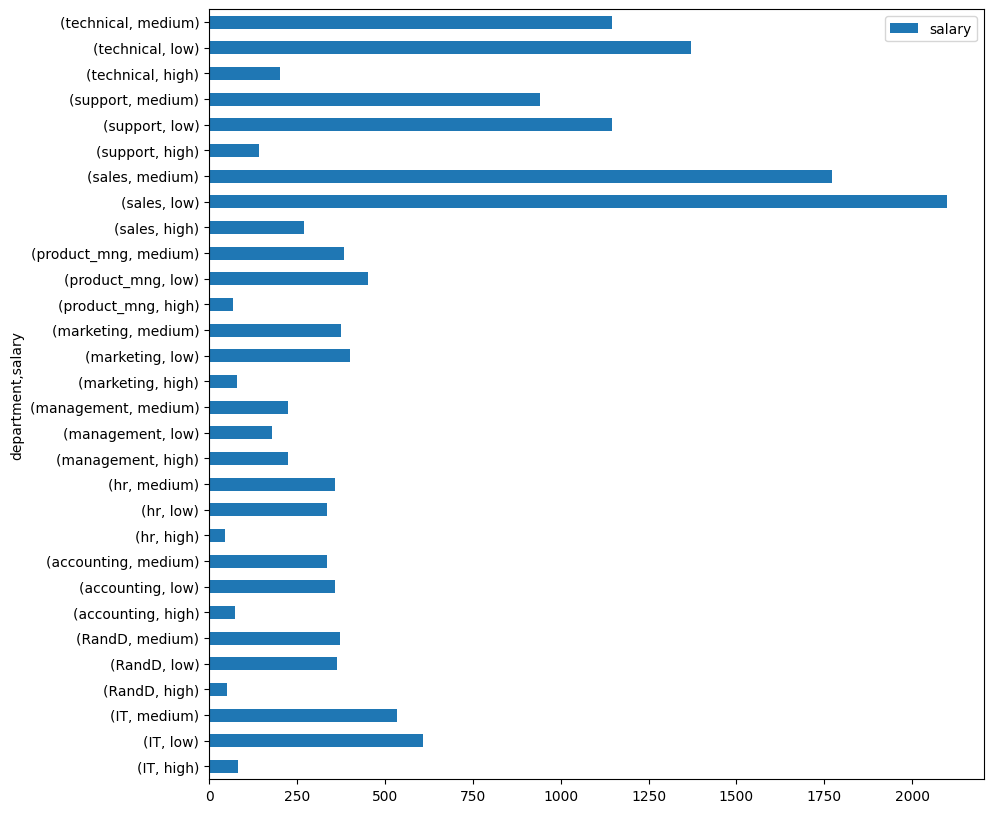

In [12]:
df.groupby([df['department'],df['salary']])[['salary']].count().plot(kind="barh",figsize=(10,10))

7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

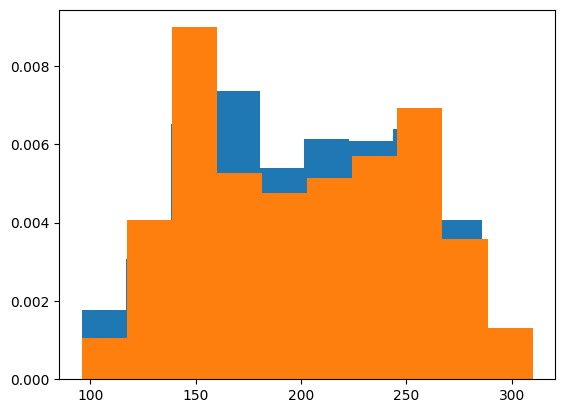

In [13]:
df_high = list(df.loc[df['salary'] == 'high']['average_montly_hours'])
df_low = list(df.loc[df['salary'] == 'low']['average_montly_hours'])
plt.hist(df_high, density=True);
plt.hist(df_low, density=True);
#по графику можем наблюдать что разницы нет

In [14]:
t, p = stats.ttest_ind(df_high, df_low)
if p>0.05:
  print(f"Уровень значимости {p} > 0.05 гипотеза не верна")
else:
  print(f"Уровень значимости {p} < 0.05 гипотеза верна")

Уровень значимости 0.4661023478267259 > 0.05 гипотеза не верна


8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [15]:
def raschet_(df, n):
  df = df.loc[df['left'] == n]
  print(f"Доля сотрудников с повышением за последние 5 лет: {len(df.loc[df['promotion_last_5years'] == 1])/len(df)}")
  print(f"Средняя степень удовлетворенности: {df['satisfaction_level'].mean()}")
  print(f"Среднее количество проектов: {df['number_project'].mean()}")

print(f"Расчёт показателей среди уволившихся сотрудников:")
raschet_(df, 1)
print(f"\nРасчёт показателей среди не уволившихся сотрудников:")
raschet_(df, 0)

Расчёт показателей среди уволившихся сотрудников:
Доля сотрудников с повышением за последние 5 лет: 0.005320638476617194
Средняя степень удовлетворенности: 0.4400980117614114
Среднее количество проектов: 3.8555026603192384

Расчёт показателей среди не уволившихся сотрудников:
Доля сотрудников с повышением за последние 5 лет: 0.026251312565628283
Средняя степень удовлетворенности: 0.666809590479524
Среднее количество проектов: 3.786664333216661


9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

Оценить качество модели на тестовой выборки

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

left = pd.array(df['left'])
X_train, X_test, y_train, y_test = train_test_split(df[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left)


lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
print(result)
accuracy_score(y_test, lda.predict(X_test))

      0  1
0     0  0
1     0  0
2     1  1
3     0  0
4     0  0
...  .. ..
3745  0  1
3746  0  0
3747  0  0
3748  0  0
3749  0  0

[3750 rows x 2 columns]


0.7546666666666667

Принимая во внимание корреляционную матрицу, на увольнение предастваленные факторы практически не влияют, по этой причине такая точность